# LangChain  Chain   :Preset chain:
LCEL LangGraph

Here are some guidelines:

- If you are making a single LLM call, you don't need LCEL; instead call the underlying chat model directly.
- If you have a simple chain (e.g., prompt + llm + parser, simple retrieval set up etc.), LCEL is a reasonable fit, if you're taking advantage of the LCEL benefits.
- If you're building a complex chain (e.g., with branching, cycles, multiple agents, etc.) use LangGraph instead. Remember that you can always use LCEL within individual nodes in LangGraph.

Simple Chain = = Model I/O(prompt + llm + parser) ->LCEL

Complex Chain = LangGraph

preset chain:
- LLMChain
- SequentialChain
- RouterChain
- APIChain,LLMMathChain,RetrievalQA.....


[LangChain](https://langchain-ai.github.io/langgraph/agents/agents/#4-add-a-custom-prompt)

## LLMChain:The simplest Chain

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain.prompts import PromptTemplate

template = "{flower}'s floral language?"

prompt_temp = PromptTemplate.from_template(template)

prompt = prompt_temp.format(flower='Rose')

print(prompt)

Rose's floral language?


In [3]:
from langchain_openai import OpenAI

model = OpenAI(temperature=0.5) # Originally 0

result = model.invoke(prompt)

print(result)



Rose's floral language is often associated with love, romance, and passion. Different colored roses can also convey different meanings, such as red for love and desire, pink for gratitude and appreciation, and white for purity and innocence. Overall, the rose is a symbol of beauty, love, and emotion.


Rose's floral language is often associated with love, passion, and romance. Different colors of roses can also convey different meanings, such as red for love and desire, pink for gratitude and appreciation, and yellow for friendship and joy.


In [4]:
#chain
from langchain.chains import LLMChain

template = "{flower}'s floral language?"
llm = OpenAI(temperature=0)

llm_chain = LLMChain(llm=llm,prompt=PromptTemplate.from_template(template))

print(llm_chain.invoke('Rose'))


C:\Users\JMY\AppData\Local\Temp\ipykernel_23616\3592295081.py:7: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain = LLMChain(llm=llm,prompt=PromptTemplate.from_template(template))


{'flower': 'Rose', 'text': "\n\nRose's floral language is often associated with love, passion, and romance. Different colors of roses can also convey different meanings, such as red for love and desire, pink for gratitude and appreciation, and yellow for friendship and joy."}


{'flower': 'Rose', 'text': "\n\nRose's floral language is often associated with love, passion, and romance. Different colors of roses can also convey different meanings, such as red for love and desire, pink for gratitude and appreciation, and yellow for friendship and joy."}


In [6]:
#LCEL
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

template = "{flower}'s floral language?"
flower_prompt = ChatPromptTemplate.from_messages([
    ("human", template)
])

chain = flower_prompt | llm | StrOutputParser()

chain.invoke({"flower": "Rose"})


'The language of flowers, or "floriography," assigns specific meanings to different flowers, and roses are among the most significant in this symbolic language. Here are some common meanings associated with various colors of roses:\n\n1. **Red Roses**: Love and passion. They are often given on romantic occasions, such as anniversaries or Valentine\'s Day.\n\n2. **White Roses**: Purity, innocence, and new beginnings. They are often used in weddings and symbolize a fresh start.\n\n3. **Pink Roses**: Gratitude, grace, and admiration. Lighter shades of pink convey sweetness, while darker shades can express appreciation.\n\n4. **Yellow Roses**: Friendship and joy. They are often given to celebrate platonic relationships or to cheer someone up.\n\n5. **Orange Roses**: Enthusiasm and desire. They convey a sense of fascination and energy.\n\n6. **Lavender Roses**: Enchantment and love at first sight. They symbolize a sense of wonder and admiration.\n\n7. **Black Roses**: Often associated with 

'The language of flowers, or "floriography," assigns specific meanings to different flowers, and roses are among the most significant in this symbolic language. Here are some common meanings associated with various colors of roses:\n\n1. **Red Roses**: Love and passion. They are often given on romantic occasions, such as Valentine\'s Day or anniversaries.\n\n2. **White Roses**: Purity, innocence, and new beginnings. They are often used in weddings and symbolize a fresh start.\n\n3. **Yellow Roses**: Friendship and joy. They convey warmth and happiness, making them suitable for platonic relationships.\n\n4. **Pink Roses**: Gratitude, grace, and admiration. Lighter shades can symbolize sweetness, while darker shades can represent appreciation.\n\n5. **Orange Roses**: Enthusiasm and desire. They convey a sense of excitement and energy.\n\n6. **Lavender Roses**: Enchantment and love at first sight. They symbolize a sense of wonder and admiration.\n\n7. **Black Roses**: Often associated with mourning or the end of something, such as a relationship or a phase in life.\n\n8. **Blue Roses**: Mystery and the unattainable. Since blue roses do not naturally occur, they symbolize something that is desired but cannot be achieved.\n\nThese meanings can vary by culture and context, but they provide a general framework for understanding the sentiments conveyed through the gift of roses.'

In [7]:
from langchain_core.runnables import RunnablePassthrough

outer_chain = RunnablePassthrough().assign(text=chain)

outer_chain.invoke({"flower": "Rose"})

{'flower': 'Rose',
 'text': "The language of flowers, also known as floriography, assigns specific meanings to different flowers, and roses are among the most significant in this symbolic language. Here are some common meanings associated with various colors of roses:\n\n1. **Red Roses**: Love and passion. They are often given on romantic occasions, such as anniversaries or Valentine's Day.\n\n2. **White Roses**: Purity, innocence, and new beginnings. They are often used in weddings and symbolize a fresh start.\n\n3. **Yellow Roses**: Friendship, joy, and warmth. They can convey feelings of happiness and are often given to friends.\n\n4. **Pink Roses**: Gratitude, grace, and admiration. Lighter shades can symbolize sweetness, while darker shades can represent appreciation.\n\n5. **Orange Roses**: Enthusiasm and desire. They convey a sense of excitement and passion.\n\n6. **Lavender Roses**: Enchantment and love at first sight. They are often associated with a sense of mystery and fasci

{'flower': 'Rose',
 'text': 'The language of flowers, or "floriography," assigns specific meanings to different flowers, and roses are among the most significant in this symbolic language. Here are some common meanings associated with various colors of roses:\n\n1. **Red Roses**: Love and passion. They are often given on romantic occasions, such as Valentine\'s Day or anniversaries.\n\n2. **White Roses**: Purity, innocence, and new beginnings. They are often used in weddings and symbolize a fresh start.\n\n3. **Yellow Roses**: Friendship and joy. They convey warmth and happiness, making them suitable for platonic relationships.\n\n4. **Pink Roses**: Gratitude, grace, and admiration. Lighter shades often represent sweetness, while deeper pinks can signify appreciation.\n\n5. **Orange Roses**: Enthusiasm and desire. They express a sense of fascination and energy.\n\n6. **Lavender Roses**: Enchantment and love at first sight. They convey a sense of magic and admiration.\n\n7. **Black Roses**: Mourning or farewell. They can symbolize the end of something, such as a relationship or a life.\n\n8. **Blue Roses**: Mystery and the unattainable. Since blue roses do not naturally occur, they often represent something elusive.\n\nThese meanings can vary by culture and context, but they provide a general framework for understanding the sentiments associated with roses in the language of flowers.'}

| Feature                 | LLMChain               | LCEL (pipe)                      |
|-------------------------|------------------------|----------------------------------|
| Style                   | Object-oriented        | Functional, modular              |
| Flexibility             | Limited                | Very flexible (branching, etc.)  |
| Input handling          | Named inputs           | Named or positional              |
| Reusability             | Moderate               | High                             |
| New LangChain features  | Somewhat outdated      | Fully supported                  |
| Syntax                  | Class-based            | Pipe-based (like Unix/Linux)     |


In [ ]:
## SequentialChain
"""
Our goal is as follows:
step 1: we assume that the large model is a botanist,asking it to provide knowledge and introductions for a specific type of flower.
step 2: we assume that the large model is a flower reviewer,asking it to reference the text output from the botanist above and provide comments on the flower.
step 3: we assume that the large model is the social media manager for Flowers,asking it to reference the text output from both the botanist and the flower reviewer above to write a flower marketing copy.

TASK chain:
flower introductions
review
social media Post

"""

In [8]:
from langchain.chains import SequentialChain
from langchain.chains import LLMChain
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.prompts import PromptTemplate

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
#LLMChain
template = """
You are botanist.Given the name and type of a flower,you need to write an introduction of about 200 words for this flower.

Name:{name}
Color:{color}
Botanist:Here is the introduction of the above flower:
"""
prompt_template = PromptTemplate(input_variables=["name","color"],template=template)
introduction_chain = LLMChain(llm=llm,prompt=prompt_template,output_key="introduction")


template = """
You are critic.Given an introduction of a flower,you need to write a review of about 200 words for this flower.

Flower introduction:
{introduction}
The flower critic's review of the above flower:
"""
prompt_template = PromptTemplate(input_variables=["introduction"],template=template)
review_chain = LLMChain(llm=llm,prompt=prompt_template,output_key="review")


template = """
You are a social media manager for a flower shop.Given an introduction and review of a flower,you need to write a social medial media post of about 300 words for this flower.

The flower critic's review of the above flower:
{review}

Social Media Post:
"""
prompt_template = PromptTemplate(input_variables=["review"],template=template)
social_post_chain = LLMChain(llm=llm,prompt=prompt_template,output_key="social_post")


In [10]:
overall_chain = SequentialChain(
    chains=[introduction_chain,review_chain,social_post_chain],
    input_variables=["name","color"],
    output_variables=["introduction","review","social_post"],
    verbose=True
)

result = overall_chain.invoke({"name":"Rose","color":"black"})
print(result)



> Entering new SequentialChain chain...

> Finished chain.
{'name': 'Rose', 'color': 'black', 'introduction': "The black rose, often shrouded in mystery and intrigue, is a captivating flower that has captured the imagination of many throughout history. While true black roses do not exist in nature, the deep, dark hues of certain varieties, such as the 'Black Baccara' or 'Black Magic,' create an illusion of blackness, making them a striking addition to any garden or floral arrangement. These roses are typically a rich, velvety red or deep purple that appears almost black under certain lighting conditions.\n\nSymbolically, black roses are often associated with themes of mourning, farewell, and the end of a cycle, making them a poignant choice for memorials or somber occasions. However, they can also represent rebirth, new beginnings, and the beauty found in darkness. In the realm of literature and art, black roses have been used to convey complex emotions, from love and passion to loss


[1m> Entering new SequentialChain chain...[0m

[1m> Finished chain.[0m
{'name': 'Rose', 'color': 'black', 

'introduction': "The black rose, often shrouded in mystery and intrigue, is a captivating flower that has captured the imagination of many throughout history. While true black roses do not exist in nature, the deep, dark hues of certain varieties, such as the 'Black Baccara' or 'Black Magic,' create an illusion of blackness, showcasing rich, velvety petals that appear almost ebony under certain lighting conditions. These roses are often associated with themes of rebirth, elegance, and the enigmatic nature of love, making them a popular choice for special occasions and artistic expressions.\n\nIn the realm of symbolism, black roses can convey a range of meanings, from the end of a relationship to the celebration of new beginnings. They are frequently used in literature and art to represent the duality of beauty and darkness, evoking a sense of passion and intensity. Cultivated primarily in temperate climates, black roses thrive in well-drained soil and require ample sunlight to flourish. Their striking appearance and unique color make them a sought-after addition to gardens and floral arrangements, appealing to those who appreciate the unconventional and the extraordinary in the world of botany.", 

'review': "The black rose, with its enigmatic allure, stands as a testament to the beauty found in darkness. While true black roses are a myth, varieties like 'Black Baccara' and 'Black Magic' offer a stunning visual experience with their deep, velvety petals that flirt with the idea of true blackness. This flower transcends mere aesthetics; it embodies a rich tapestry of symbolism that resonates deeply with those who encounter it. \n\nIn the realm of floral arrangements, the black rose is a bold statement piece, often evoking a sense of mystery and sophistication. Its association with themes of rebirth and the complexities of love adds layers of meaning, making it a compelling choice for both joyous celebrations and somber farewells. The duality of beauty and darkness that the black rose represents is a powerful reminder of the intricate nature of human emotions.\n\nCultivating these roses requires a bit of care, as they thrive in well-drained soil and need ample sunlight. However, the effort is well worth it for those who appreciate the unconventional. In a world where traditional blooms often dominate, the black rose stands out as a striking symbol of individuality and depth, making it a must-have for any garden or floral enthusiast seeking to embrace the extraordinary.", 

'social_post': "🌹✨ Embrace the Enigma of the Black Rose! ✨🌹\n\nAt [Your Flower Shop Name], we believe that every flower tells a story, and the black rose is one of the most captivating tales in the floral world. While true black roses may be a myth, varieties like 'Black Baccara' and 'Black Magic' bring a stunning visual experience that flirts with the idea of true darkness. Their deep, velvety petals create an alluring contrast that is simply irresistible! \n\nBut the black rose is more than just a pretty face. It embodies a rich tapestry of symbolism, representing the complexities of love, rebirth, and the beauty found in darkness. Whether you're celebrating a joyous occasion or bidding farewell, this bold bloom adds a layer of sophistication and mystery to any arrangement. 🌌💔\n\nCultivating these beauties requires a little extra care, as they thrive in well-drained soil and bask in the sunlight. But trust us, the effort is worth it! The black rose stands out in a world filled with traditional blooms, making it the perfect choice for those who dare to be different. 🌿🌞\n\nAre you ready to embrace the extraordinary? Visit us at [Your Flower Shop Name] to discover our stunning selection of black roses and let their enchanting beauty inspire you. Whether you're looking to make a statement in your garden or surprise a loved one with a unique bouquet, the black rose is sure to leave a lasting impression. \n\nJoin us in celebrating the allure of the black rose! Share your favorite black rose moments with us using #BlackRoseBeauty and let’s spread the magic together! 🌹🖤\n\n#FlowerShop #BlackRose #FloralArt #UniqueBlooms #EmbraceTheExtraordinary"}


In [11]:
#Runnable(LCEL)  +  .pipe()
"""
1.instroduction
2.review
Social media post

"""
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import Runnable, RunnablePassthrough

In [12]:
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7)

In [13]:
# Flower Introduction Prompt
introduction_template = """
You are a botanist. Given the name and type of a flower, you need to write an introduction of about 200 words for this flower.

Name: {name}
Color: {color}
Botanist: Here is the introduction of the above flower:
"""
introduction_prompt = ChatPromptTemplate.from_template(introduction_template)


In [14]:
# Flower Review Prompt
review_template = """
You are a critic. Given an introduction of a flower, you need to write a review of about 200 words for this flower.

Flower introduction:
{introduction}
The flower critic's review of the above flower:
"""
review_prompt = ChatPromptTemplate.from_template(review_template)

In [15]:
# Social Media Post Prompt
social_post_template = """
You are a social media manager for a flower shop. Given an introduction and review of a flower, you need to write a social media post of about 300 words for this flower.

The flower critic's review of the above flower:
{review}

Social Media Post:
"""
social_post_prompt = ChatPromptTemplate.from_template(social_post_template)

In [16]:
# Define individual Runnables
introduction_chain = introduction_prompt | llm | StrOutputParser()
review_chain = {"introduction":introduction_chain} | review_prompt | llm | StrOutputParser()
social_post_chain = {"review":review_chain} | social_post_prompt | llm | StrOutputParser()


Runnable:LCEL

In [17]:
#Runnable-LCEL
social_post_chain.invoke({"name":"Rose","color":"black"})

"🌹✨ Embrace the Enigma of the Black Rose! ✨🌹\n\nAre you ready to add a touch of mystery and elegance to your floral arrangements? Meet the captivating BLACK ROSE, a flower that not only mesmerizes with its deep, velvety petals but also carries a powerful narrative that speaks to the heart and soul. \n\nWhile true black roses are a rare find in nature, varieties like ‘Black Baccara’ and ‘Black Magic’ bring forth stunning shades of deep crimson and purple that create an air of intrigue and drama. These blooms are not just flowers; they are symbols of life’s beautiful contrasts, representing both the end of an era and the promise of new beginnings. Whether you're looking to express love, commemorate a special moment, or simply enhance your space, the black rose is the perfect choice to elevate any occasion.\n\nImagine the impact of a bouquet featuring these striking flowers—ideal for romantic gestures, somber gatherings, or even as a unique centerpiece that sparks conversation. Their luxu

"🌹✨ Embrace the Mystery of the Black Rose! ✨🌹 \n\nStep into a world where elegance meets enigma with our stunning collection of black roses! While true black roses may be a myth, varieties like 'Black Baccara' and 'Black Magic' present a breathtaking array of deep red and purple hues that create an alluring, gothic charm. These blooms are not just flowers; they are statements of artistry and emotion, perfect for anyone looking to add a touch of drama to their floral arrangements.\n\nThe black rose is steeped in rich symbolism, representing the complexities of love, the cycles of life, and the beauty found in both death and rebirth. Whether you choose to feature them as a solitary bloom or incorporate them into a grand bouquet, these flowers command attention and spark conversation. 🌑💖\n\nBut remember, with great beauty comes great responsibility! The black rose can evoke a range of feelings, so it’s essential to use them thoughtfully. They can symbolize passion and romance when placed in the right context, but they may also convey sorrow if misinterpreted. \n\nAt [Your Flower Shop Name], we offer an exquisite selection of these captivating blooms, perfect for expressing your deepest sentiments or adding an edge to your decor. 🌸✨\n\nReady to dive into the world of black roses? Visit us in-store or online to explore our collection and find the perfect floral piece that speaks to your heart. Let the allure of the black rose inspire your next bouquet! 💐🖤\n\n#BlackRose #FlowerShop #GothicElegance #FloralArt #Symbolism #LoveAndLife #FloralsWithMeaning #ShopLocal"

In [18]:
introduction_chain.invoke({"name":"Rose","color":"black"})

"The black rose, a captivating and enigmatic flower, has long been a symbol of mystery and intrigue in various cultures. While true black roses do not exist in nature, the deep, dark hues of certain varieties, such as the ‘Black Baccara’ and ‘Black Magic,’ create an illusion of blackness, enchanting flower enthusiasts and gardeners alike. These roses typically exhibit rich, velvety shades of dark red or maroon that can appear almost black under certain lighting conditions, adding to their allure.\n\nHistorically, black roses have been associated with themes of death, mourning, and farewell, often appearing in literature and art to evoke a sense of melancholy. However, modern interpretations have expanded their symbolism to include rebirth, new beginnings, and the celebration of the unique beauty found in darkness. The black rose's striking appearance makes it a popular choice for dramatic floral arrangements, gothic-themed events, and as a statement piece in gardens.\n\nCultivating bla

'The black rose, a captivating and enigmatic flower, has long been a symbol of mystery and intrigue in the botanical world. Unlike the more common varieties of roses that showcase vibrant hues, the black rose boasts a deep, velvety color that evokes a sense of elegance and sophistication. While true black roses do not exist in nature, they can be created through selective breeding and dyeing techniques, resulting in blooms that appear nearly black, often with undertones of deep red or purple. \n\nHistorically, black roses have been associated with themes of rebirth, farewell, and the darker aspects of love. They often serve as powerful symbols in literature and art, representing the duality of beauty and mortality. In gardens, black roses can make a striking statement, adding a touch of drama and allure. \n\nCultivating black roses requires specific care, including well-draining soil and adequate sunlight, making them both a challenge and a delight for gardeners. As a unique addition to any floral arrangement, black roses are sure to leave a lasting impression, inviting contemplation and admiration for their rare beauty and symbolism.'

In [19]:
review_chain.invoke({"name":"Rose","color":"black"})

'The black rose, with its enigmatic allure and deep cultural roots, stands as a striking testament to the duality of beauty and melancholy in the floral world. Despite its name, the black rose is not a true black specimen; rather, it presents a sumptuous hue of deep maroon or purple that can appear almost obsidian under the right light. This captivating visual quality makes it a favored choice for those seeking to convey a sense of mystery and depth in their floral arrangements.\n\nOne cannot overlook the profound symbolism associated with the black rose. Historically linked to themes of mourning and farewells, it simultaneously evokes feelings of rebellion and strength, making it a complex flower that resonates on multiple levels. Whether adorning a somber occasion or celebrating a moment of profound change, the black rose eloquently encapsulates the bittersweet nature of life.\n\nFrom a horticultural perspective, black roses offer versatility within the Rosa species, thriving in vari

"The black rose, an alluring and enigmatic creation of nature, stands as a testament to the duality of beauty and darkness. While it may not exist in pure form, the dark-hued varieties, such as 'Black Baccara' and 'Black Magic,' are nothing short of breathtaking. Their deep crimson petals, which flirt with the illusion of black, create a visual paradox that captivates the imagination. This color play under varying light conditions adds an intriguing layer to their aesthetic, making them a popular choice for both somber occasions and romantic expressions.\n\nThe symbolism behind the black rose is multifaceted. It embodies the end of a chapter, often associated with loss, yet it simultaneously whispers of rebirth and transformation. This complexity resonates deeply, inviting introspection and emotional connection. The robust fragrance that accompanies these striking blooms further enhances their allure, making them not just a visual treat but also a sensory experience.\n\nCultivating black roses demands diligence and expertise, reflecting the care required to nurture beauty from the shadows. For gardeners and flower enthusiasts alike, the black rose is more than just a plant; it is a statement, a conversation starter, and a powerful symbol of the intricate dance between love and longing. In a world that often shies away from darkness, the black rose boldly embraces it, offering solace and beauty in its wake."

In [20]:
#RunnablePassthrough
from langchain_core.runnables import RunnablePassthrough
outer_chain = RunnablePassthrough().assign(text=social_post_chain)
outer_chain.invoke({"name":"Rose","color":"black"})

{'name': 'Rose',
 'color': 'black',
 'text': "🌹✨ Discover the Enigmatic Allure of the Black Rose! ✨🌹\n\nAt [Your Flower Shop Name], we believe that every flower tells a story, and none are as captivating as the black rose. With its deep, mysterious hues, this floral wonder evokes a sense of drama and elegance that’s simply irresistible. While true black roses may be a botanical fantasy, varieties like 'Black Baccara' and 'Black Magic' bring a stunning, dark beauty to life, often appearing almost black in the right light. \n\nPerfect for those who dare to be different, the black rose serves as a powerful symbol that traverses the spectrum of human emotion—from heart-wrenching goodbyes to the hopeful beginnings of new chapters. It’s a flower that invites contemplation, making it an exceptional choice for both gardens and floral arrangements. Whether you’re looking to add a touch of mystery to your home or send a meaningful message to a loved one, the black rose is sure to command attenti

{'name': 'Rose',
 'color': 'black',
 'text': "🌹✨ Embrace the Mystery: The Allure of Black Roses! ✨🌹\n\nStep into a world of enchantment with the captivating black rose! While true black roses are a botanical myth, varieties like 'Black Baccara' and 'Black Velvet' reveal an exquisite depth of color that can appear jet black, especially in the soft glow of candlelight. These stunning flowers are not just a feast for the eyes; they carry a rich tapestry of meaning, evolving from symbols of mourning to representations of rebirth and new beginnings. \n\nImagine adding a touch of gothic elegance to your garden or floral arrangements—black roses evoke a sense of drama and intrigue that few other blooms can match. Their velvety petals and graceful form have captivated artists and romantics for centuries, making them a timeless choice for expressing deep emotions or simply enhancing your floral artistry.\n\nCultivating black roses does require a bit of tender loving care. These beauties thrive in optimal soil conditions and sunlight, but for those willing to invest the effort, the reward is a breathtaking showpiece that stands out in any setting. 🌿💧\n\nWhether you're looking to convey a complex sentiment or simply want to add a unique flair to your floral collection, black roses are a beloved choice among horticulturists and flower lovers alike. 🌑❤️\n\nVisit us at [Your Flower Shop Name] to discover our selection of stunning black roses and learn how to incorporate these elegant blooms into your arrangements. Let the mystery of black roses inspire your creativity and transform your space! 🌸💫\n\n#BlackRoses #FloralElegance #FlowerPower #GardenBeauty #MysteryInBloom #YourFlowerShopName"}

In [ ]:
# hw:1.Use the .pipe() method to accomplish this.


In [21]:
from langchain_core.runnables import RunnableParallel

review_chain = (
    RunnableParallel({"introduction": introduction_chain})
    .pipe(review_prompt)
    .pipe(llm)
    .pipe(StrOutputParser())
)

review_chain.invoke({"name": "Rose", "color": "black"})


"The black rose, often hailed as the flower of mystery, is an exquisite testament to nature's complexity and artistry. While it is true that a pure black rose doesn't exist in the natural world, varieties such as ‘Black Baccara’ and ‘Black Magic’ masterfully capture the essence of darkness with their deep crimson petals cloaked in shadows. This striking visual allure invites intrigue and admiration, setting the black rose apart from its more traditional counterparts.\n\nIts velvety texture paired with undertones of burgundy or purple adds a luxurious depth that is simply enchanting. This floral marvel not only captivates the eye but also evokes a rich tapestry of emotions, ranging from sorrow to rebirth, making it an ideal choice for gothic-themed arrangements or those seeking to convey complex sentiments.\n\nCultivation of the black rose presents unique challenges, appealing to both seasoned botanists and enthusiastic gardeners. The need for well-drained soil and abundant sunlight und

In [22]:
from langchain_core.runnables import RunnableParallel

social_post_chain = (
    RunnableParallel({"review": review_chain})
    .pipe(social_post_prompt)
    .pipe(llm)
    .pipe(StrOutputParser())
)

social_post_chain.invoke({"name": "Rose", "color": "black"})


"🌹✨ Introducing the Enigmatic Black Rose! ✨🌹\n\nStep into the world of mystery and allure with our exquisite black rose! While nature may not gift us with true black blooms, the deep crimson and enchanting purple varieties we offer encapsulate a haunting beauty that stirs the soul and captivates the imagination.\n\nThe black rose is more than just a flower; it’s a canvas for emotions, effortlessly merging elegance with the melancholic shadows of life. Perfectly suited for those who appreciate the complexities of love and beauty, these roses tell a story that words often fail to express. Whether you're celebrating rebirth, remembrance, or simply the beauty of existence, the black rose serves as a powerful symbol for every occasion.\n\nVisually striking with its velvety petals, the black rose stands out dramatically against lighter blooms, making it an essential addition to any floral arrangement. It's not just about aesthetics; this flower has become a muse in literature and art, repres

introduction_chain = introduction_prompt | llm | StrOutputParser()

chain.pipe(step1).pipe(step2)
chain | step1 | step2


In [ ]:
"""Task:Flower operation intelligent customer service ChatBot typically recevied two main types of inquiries.
1. flower care
2. flower decoration

requirement:Direct ChatBot A if receives the first type of inquiry and direct ChatBot B if receives the Second type of inquiry
"""



RouterChain -V2
"""
LLMRouterChain + MultiPromptChain
steps:
1. Construct processing tempaltes:define two string templates for ...
2. Prompt information:using a list
3. LLM
4. Buid target chains:LLMChain
5. Build LLM Routing Chain
6. Build default chain
7. Built Multi-Prompt Chain->LangGraph
"""

Router Task
1. LangGraph:StateGraph + langchain:
2. Prompt information:using a list
3. LLM
4.task chain
5.StateGraph
6.execution

In [23]:
from dotenv import load_dotenv
load_dotenv()

True

In [24]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableConfig
from langchain_openai import ChatOpenAI
from langgraph.graph import END, START, StateGraph
from typing_extensions import TypedDict


# graph.get_graph().draw_mermaid()  # instead of .draw_mermaid_png()


# Initialize the LLM model
llm = ChatOpenAI(model="gpt-4o-mini")

In [25]:
# Create prompt templates
flower_care_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are an experienced gardener."),
    ("human", "{input}")
])

flower_deco_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a popular flower arrangement master."),
    ("human", "{input}")
])


In [26]:
print(flower_care_prompt)

input_variables=['input'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are an experienced gardener.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})]


input_variables=['input'] messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are an experienced gardener.')), 
HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}'))]


In [27]:
print(flower_deco_prompt)

input_variables=['input'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a popular flower arrangement master.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})]


input_variables=['input'] messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a popular flower arrangement master.')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}'))]


In [28]:
# Define chains for each prompt
chain_1 = flower_care_prompt | llm | StrOutputParser()
chain_2 = flower_deco_prompt | llm | StrOutputParser()

In [29]:
# Define the routing logic
route_system = "Route the user's query to either flower care or flower decoration expert."
route_prompt = ChatPromptTemplate.from_messages([
    ("system", route_system),
    ("human", "{input}")
])

In [30]:
route_template = route_prompt.messages

for message in route_template:
    print(f"Message type: {message.__class__.__name__}")
    print(f"Message content: {message.prompt}")
    print("-" * 40)

print(route_prompt)

Message type: SystemMessagePromptTemplate
Message content: input_variables=[] input_types={} partial_variables={} template="Route the user's query to either flower care or flower decoration expert."
----------------------------------------
Message type: HumanMessagePromptTemplate
Message content: input_variables=['input'] input_types={} partial_variables={} template='{input}'
----------------------------------------
input_variables=['input'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template="Route the user's query to either flower care or flower decoration expert."), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})]


Message type: SystemMessagePromptTemplate
Message content: input_variables=[] template="Route the user's query to either flower care or flower decoration expert."
----------------------------------------
Message type: HumanMessagePromptTemplate
Message content: input_variables=['input'] template='{input}'
----------------------------------------
input_variables=['input'] messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template="Route the user's query to either flower care or flower decoration expert.")), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}'))]


In [31]:
from typing_extensions import Literal

# Define schema for the routing output
class RouteQuery(TypedDict):
    destination: Literal["flower care expert", "flower decoration expert"]

route_chain = route_prompt | llm.with_structured_output(RouteQuery)

In [32]:
# Define graph state
class State(TypedDict):
    query: str
    destination: RouteQuery
    answer: str

# Define functions for routing and processing each chain
async def route_query(state: State, config: RunnableConfig):
    destination = await route_chain.ainvoke(state["query"], config)
    return {"destination": destination}

async def prompt_1(state: State, config: RunnableConfig):
    return {"answer": await chain_1.ainvoke(state["query"], config)}

async def prompt_2(state: State, config: RunnableConfig):
    return {"answer": await chain_2.ainvoke(state["query"], config)}


In [33]:
# Define the node selection based on the routing decision
def select_node(state: State) -> str:
    print("select_node called with:", state)
    if state["destination"]["destination"] == "flower care expert":
        return "prompt_1"
    else:
        return "prompt_2"

In [34]:
# Build the state graph
graph = StateGraph(State)
graph.add_node("route_query", route_query)
graph.add_node("prompt_1", prompt_1)
graph.add_node("prompt_2", prompt_2)

# Add edges between the nodes, starting from routing and following the selection logic
graph.add_edge(START, "route_query")
graph.add_conditional_edges("route_query", select_node)
graph.add_edge("prompt_1", END)
graph.add_edge("prompt_2", END)

# Compile the graph into an app
app = graph.compile()

# await app.ainvoke({
#     "query": "How do I care for roses?"
# })

await app.ainvoke({
    "query": "How can I make a rose bouquet look modern?"
})


select_node called with: {'query': 'How can I make a rose bouquet look modern?', 'destination': {'destination': 'flower decoration expert'}}


{'query': 'How can I make a rose bouquet look modern?',
 'destination': {'destination': 'flower decoration expert'},
 'answer': "Creating a modern rose bouquet involves incorporating contemporary design elements and materials while showcasing the natural beauty of the roses. Here are some tips to achieve a modern look:\n\n### 1. **Choose Color Palette:**\n   - Opt for unexpected color combinations like soft pastels mixed with bold, vibrant hues or even monochromatic shades of a single color (e.g., different shades of pink or white).\n   - Consider adding unexpected colors, such as deep navy, emerald green, or even metallics like gold or copper.\n\n### 2. **Select Unique Varieties:**\n   - Look for unique rose varieties with interesting textures or shapes, such as garden roses, spray roses, or those with unusual petal forms.\n   - Incorporate other modern flowers or greenery that complement your roses.\n\n### 3. **Minimalist Arrangement:**\n   - Focus on a cleaner, simpler design. Less 

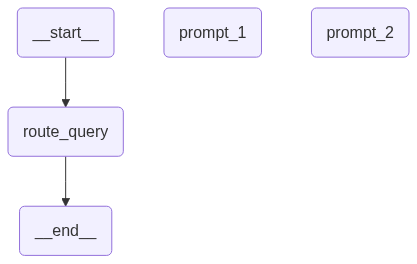

In [35]:
from IPython.display import Image
Image(app.get_graph().draw_mermaid_png())     # for PNG
# print(app.get_graph().draw_mermaid())         # for Mermaid text


In [36]:
# Run the app for a flower care question
state = await app.ainvoke({"query": "How to water roses?"})
print(f"Destination: {state['destination']['destination']}")
print(f"Answer: {state['answer']}")


select_node called with: {'query': 'How to water roses?', 'destination': {'destination': 'flower care expert'}}
Destination: flower care expert
Answer: Watering roses properly is essential for their healthy growth and blooming. Here are some tips on how to water roses effectively:

### 1. **Watering Technique:**
   - **Deep Watering:** Water deeply but less frequently. This encourages deep root growth. Aim for about 1 to 2 inches of water per week, either through rainfall or supplemental watering.
   - **Soak the Soil:** Focus on soaking the root zone rather than just the surface. Allow the water to penetrate the soil so it reaches the roots.

### 2. **Best Time to Water:**
   - **Morning Watering:** The best time to water is early in the morning when temperatures are cooler. This helps reduce evaporation and allows the plants to absorb moisture before the heat of the day.
   - **Avoid Night Watering:** Watering in the evening can leave the foliage damp overnight, increasing the risk o

Destination: flower care
Answer: Watering roses properly is crucial for their health and blooming. Here are some tips on how to water roses effectively:

1. **Timing**: Water your roses early in the morning or late in the afternoon to reduce evaporation. Avoid watering during the hottest part of the day.

2. **Method**: Use a soaker hose or drip irrigation system for deep watering. This method delivers water directly to the roots and minimizes water on the foliage, which can help prevent fungal diseases. If using a watering can or hose, direct the water at the base of the plant.

3. **Amount**: Roses typically need about 1-2 inches of water per week, depending on weather conditions. During hot, dry spells, they may need more. Ensure the soil is moist but not soggy.

4. **Soil Check**: Before watering, check the soil moisture by sticking your finger about an inch into the soil. If it feels dry at that depth, it’s time to water.

5. **Mulching**: Apply a layer of mulch around the base of the roses. Mulch helps retain soil moisture and keeps the roots cool.

6. **Avoid Overhead Watering**: Try to avoid getting the leaves wet, as this can promote diseases. Focus on watering the root zone.

7. **Adjust for Conditions**: Be aware of your local climate and adjust your watering schedule accordingly. In rainy weather, you may need to reduce watering.

By following these guidelines, you can promote healthy growth and vibrant blooms in your rose plants.


In [37]:
# Run the app for a flower care question
state = await app.ainvoke({"query": "How to decorate the wedding venue with flowers?"})
print(f"Destination: {state['destination']['destination']}")
print(f"Answer: {state['answer']}")


select_node called with: {'query': 'How to decorate the wedding venue with flowers?', 'destination': {'destination': 'flower decoration expert'}}
Destination: flower decoration expert
Answer: Decorating a wedding venue with flowers is a beautiful way to enhance the atmosphere and create a romantic setting. Here are some tips and ideas to consider when planning your floral decorations:

### 1. **Theme and Color Palette**
   - **Choose a Theme:** Select a wedding theme (rustic, vintage, modern, etc.) that guides your flower choices.
   - **Color Coordination:** Decide on a color palette that complements the venue and overall decor. Ensure your flowers match or complement the color scheme.

### 2. **Flower Selection**
   - **Seasonal Flowers:** Use flowers that are in season for freshness and cost-effectiveness.
   - **Signature Flowers:** Consider incorporating flowers that have personal significance, or that reflect the couple's story.

### 3. **Key Floral Areas**
   - **Ceremony Backdr

In [70]:
# Run the app for a flower care question
state = await app.ainvoke({"query": "I'm Anna?"})
print(f"Destination: {state['destination']['destination']}")
print(f"Answer: {state['answer']}")


select_node called with: {'query': "I'm Anna?", 'destination': {'destination': 'flower care'}}
Destination: flower care
Answer: Hi, Anna! It’s great to meet you. How can I assist you today with flower arrangements or anything else you might need?


In [71]:
# hw:2.How to implement routing chains when they do not belong to any operational business scenarios?



In [74]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableConfig
from langchain_openai import ChatOpenAI
from langgraph.graph import END, START, StateGraph
from typing_extensions import TypedDict, Literal



# graph.get_graph().draw_mermaid()  # instead of .draw_mermaid_png()


# Initialize the LLM model
llm = ChatOpenAI(model="gpt-4o-mini")

In [75]:
# -----------------------------------------
# 1. Define schema for routing output
class RouteQuery(TypedDict):
    destination: Literal["math", "poem", "summary"]

# 2. Prompt for routing decision
route_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a router that decides if a question is about math, poetry, or summarization."),
    ("human", "{input}")
])

# 3. Routing chain with structured output
route_chain = route_prompt | llm.with_structured_output(RouteQuery)

In [76]:
# -----------------------------------------
# 4. Define graph state
class State(TypedDict):
    query: str
    destination: RouteQuery
    answer: str

# -----------------------------------------
# 5. Node functions

async def route_query(state: State, config: RunnableConfig):
    destination = await route_chain.ainvoke(state["query"], config)
    return {"destination": destination}
    

In [82]:
# Prompts
math_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful math tutor."),
    ("human", "{query}")
])
poem_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a master poet."),
    ("human", "{query}")
])
summary_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are an expert summarizer."),
    ("human", "{query}")
])

# Chains
math_chain = math_prompt | llm | StrOutputParser()
poem_chain = poem_prompt | llm | StrOutputParser()
summary_chain = summary_prompt | llm | StrOutputParser()

# Handlers
async def math_expert(state: State, config: RunnableConfig):
    return {"answer": await math_chain.ainvoke(state["query"], config)}

async def poet(state: State, config: RunnableConfig):
    return {"answer": await poem_chain.ainvoke(state["query"], config)}

async def summarizer(state: State, config: RunnableConfig):
    return {"answer": await summary_chain.ainvoke(state["query"], config)}


In [83]:
# -----------------------------------------
# 6. Routing logic
def select_node(state: State) -> str:
    print("select_node called with:", state)
    dest = state["destination"]["destination"]
    if dest == "math":
        return "math_expert"
    elif dest == "poem":
        return "poet"
    elif dest == "summary":
        return "summarizer"
    else:
        return "summarizer"  # fallback

# -----------------------------------------
# 7. Build the graph
graph = StateGraph(State)
graph.add_node("route_query", route_query)
graph.add_node("math_expert", math_expert)
graph.add_node("poet", poet)
graph.add_node("summarizer", summarizer)

graph.add_edge(START, "route_query")
graph.add_conditional_edges("route_query", select_node)
graph.add_edge("math_expert", END)
graph.add_edge("poet", END)
graph.add_edge("summarizer", END)

app = graph.compile()

In [84]:
'''Testing results'''
# Math
await app.ainvoke({"query": "Solve 5x - 2 = 13"})


select_node called with: {'query': 'Solve 5x - 2 = 13', 'destination': {'destination': 'math'}}


{'query': 'Solve 5x - 2 = 13',
 'destination': {'destination': 'math'},
 'answer': 'To solve the equation \\( 5x - 2 = 13 \\), follow these steps:\n\n1. Add 2 to both sides of the equation:\n   \\[\n   5x - 2 + 2 = 13 + 2\n   \\]\n   This simplifies to:\n   \\[\n   5x = 15\n   \\]\n\n2. Now, divide both sides by 5:\n   \\[\n   \\frac{5x}{5} = \\frac{15}{5}\n   \\]\n   This simplifies to:\n   \\[\n   x = 3\n   \\]\n\nSo, the solution is \\( x = 3 \\).'}

In [85]:
# Poet
await app.ainvoke({"query": "Write a haiku about the moon"})

select_node called with: {'query': 'Write a haiku about the moon', 'destination': {'destination': 'poem'}}


{'query': 'Write a haiku about the moon',
 'destination': {'destination': 'poem'},
 'answer': "Silver whispers glow,  \nCradled in the night's embrace,  \nSilent dreams take flight."}

In [86]:
# Summarizer
await app.ainvoke({"query": "Summarize the theory of relativity"})

select_node called with: {'query': 'Summarize the theory of relativity', 'destination': {'destination': 'summary'}}


{'query': 'Summarize the theory of relativity',
 'destination': {'destination': 'summary'},
 'answer': 'The theory of relativity, developed by Albert Einstein in the early 20th century, consists of two main parts: special relativity and general relativity. \n\n1. **Special Relativity (1905)**: This framework addresses the physics of objects moving at constant speeds, especially at speeds close to the speed of light. It introduces two key concepts:\n   - The laws of physics are the same for all observers in uniform motion relative to one another (principle of relativity).\n   - The speed of light in a vacuum is constant and will be the same for all observers, regardless of their motion (invariance of the speed of light).\n   \n   Special relativity leads to several counterintuitive conclusions, such as time dilation (moving clocks tick slower) and length contraction (moving objects are measured to be shorter in the direction of motion).\n\n2. **General Relativity (1915)**: This theory e

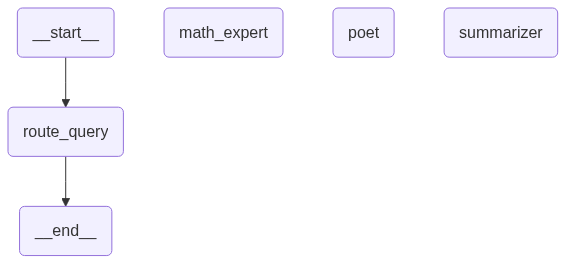

In [88]:
from IPython.display import Image

# Show graph as PNG (may be incomplete — doesn’t show conditional edges)
Image(app.get_graph().draw_mermaid_png())

# OR: show Mermaid diagram text (copy into https://mermaid.live for full diagram)
# print(app.get_graph().draw_mermaid())
